# Face Recognition using Principal Component Analysis

### <b>Objective:</b>
This question requires you to create a basic facial recognition system using a technique called principal component analysis (PCA) 
by projecting the face images on the feature space (face space) which best
represents the variations among distinct faces. The face space is defined as the
“Eigenfaces", which are the eigenvectors of the set of faces.

The goal of implementing this system is to recognize a person's face by comparing it to a pre-existing database of faces, and identifying the closest match.

Link to paper on Eigenfaces: [https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf](https://sites.cs.ucsb.edu/~mturk/Papers/mturk-CVPR91.pdf)

### <b>About the dataset:</b>  
The AT&T face dataset contains a set of grayscale face images with dimensions 92x112. The images are organised in 40 directories (one for each subject), which have names of the form sX, where X indicates the subject number (between 1 and 40). In each of these directories, there are ten different images of that subject, which have names of the form Y.pgm, where Y is the image number for that subject (between 1 and 10). These 10 images per person are taken at different times, varying the lighting, facial expressions (open / closed eyes, smiling / not smiling) and facial details (glasses / no glasses). All the images were taken against a dark homogeneous background with the subjects in an upright, frontal position (with tolerance for some side movement). <b>Link:</b> [https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/](https://git-disl.github.io/GTDLBench/datasets/att_face_dataset/)

#### Import Libraries

In [ ]:
## Importing support libraries
import numpy as np ## for numerical calculations of arrays
import pandas as pd ## for reading csv file and wroking with dataframe operations
from PIL import Image ## for image processing and output
import cv2 ## for image processing
from numpy import linalg as LA ## numpy's Linear Algebra library
import os ## for reading images from image folder
import math
from scipy.spatial import distance ## for calculating distance between two entities
import requests ## to get the file from url
from sklearn.model_selection import train_test_split


#### Import Dataset
Assign labels for the images based on the subdirectories to obtain X(images array) and y (labels).

Ensure that the test data contains atleast one image from each category.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Implement PCA Algorithm.

Explain your steps with comments and write a brief explanation of the method.

In [ ]:
initial = 0
y = []

In [ ]:
## BASE is the name of the base folder
BASE = "./drive/MyDrive/ATnT"

filepaths = [] # Contains the absolute paths of all the image files
for filename in os.listdir(BASE):
  d=BASE + '/' + filename
  if os.path.isdir(d):
    for filename1 in os.listdir(d):
      filepaths.append(d + '/' + filename1)
      y.append(initial)
    initial += 1

filepaths.sort()

## Converting filepaths list to dataframe
df = pd.DataFrame({'filepaths':filepaths})
y = np.array(y)

In [ ]:
total_images = 400
total_classes = 40

In [ ]:
from google.colab.patches import cv2_imshow

face_vector = []

for i in range(total_images):
    img = cv2.imread(filepaths[i])
    face_image = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    face_image = face_image.reshape(face_image.shape[0]*face_image.shape[1],)
    face_vector.append(face_image)

    # cv2_imshow(face_image)
face_vector = np.asarray(face_vector)

In [ ]:
"""
Implement pca in the following function by taking the following arguements:
1. X(images array)
2. number of components
The function must return the eigen vectors (principal components) also termed "Eigen faces"
"""
def principalComponentAnalysis(X, number_of_compoonents):
  # mean 
  Xmean = np.mean(X, axis=0)
  X = X - Xmean

  # covariance
  cov = np.cov(X.T)

  # eigenvectors, eigenvalues
  eigenvalues, eigenvectors = np.linalg.eigh(cov)

  eigenvectors = eigenvectors[:,::-1]
  # self.components = eigenvectors
  return eigenvectors, Xmean


#### Implement Image Reconstruction from Eigenfaces


Explain your steps with comments and write a brief explanation of the method.

In [ ]:
# Function to implement image reconstruction by taking arguements as necessary.
def imageReconstruction(X, eigenvectors, Xmean):
  X = X - Xmean
  return np.dot(X, eigenvectors)

#### Visualisation
Visualise the results for different number of principal components(pc = 5,10,100, 1000, all).

**Note:** Ensure that the images are labelled appropriately.

In [ ]:
X = face_vector
eigenvectors, Xmean = principalComponentAnalysis(X, 100)

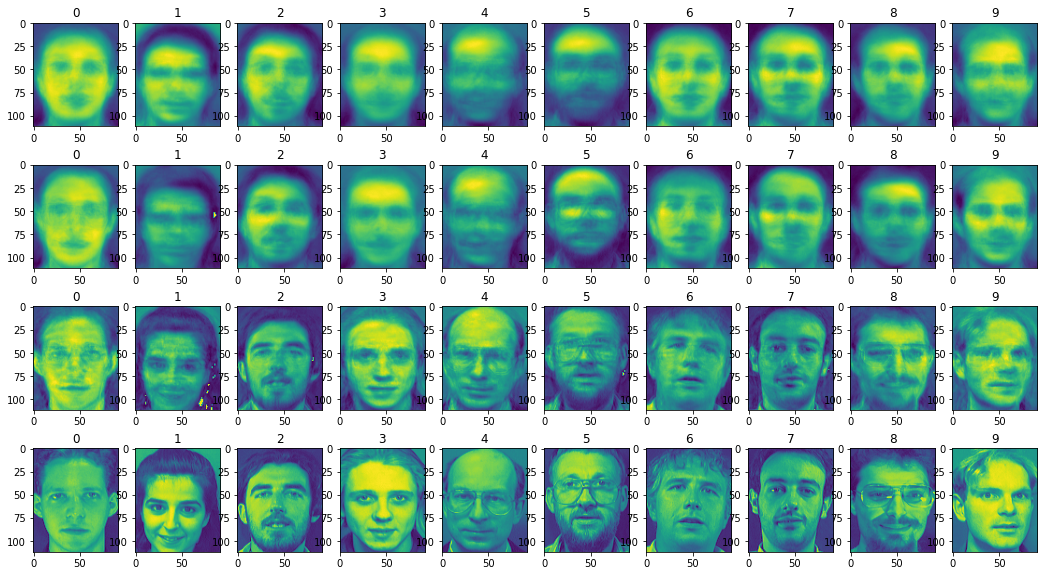

In [ ]:
pc = [5, 10, 100, 1000]
imm = []
yy = []

for i in range(len(pc)):
  X_reduced = imageReconstruction(X, eigenvectors[:,:pc[i]], Xmean)
  ev = eigenvectors[:,:pc[i]]
  eigen_faces = np.dot(X_reduced, ev.T) + Xmean

  for j in range(10):
    yy.append(y[j*10])
    imm.append(Image.fromarray(eigen_faces[j*10].reshape(112, 92).astype('uint8')))

_, axs = plt.subplots(4, 10, figsize=(18, 10))
axs = axs.flatten()
ind =0
for img, ax in zip(imm, axs):
    ax.set_title(yy[ind])
    ax.imshow(img)
    ind+=1
plt.show()

#### Implement face recognition module based on the norm
Explain your steps with comments and write a brief explanation of the method.

*   Test the module and report accuracies based on the number of components taken for a range of value and plot them. 
*   Also plot the mean square error vs the number of eigenvectors taken and report your observations. 
*   For further empirical analysis, plot the semi-log variant of the error plot obtained above.

In [ ]:
"""
Implement pca in the following function by taking the following arguements:
1. Test image
2. Eigenvectors
3. Mean Eigen Face
4. Training Set(X_train,y_train)
The function must return the following:
1. image with smallest error
2. error value
3. prediction class
"""
def calc_error(transformed_image , orig_image): 
    error = (np.sum((transformed_image - orig_image)**2))
    return error

def model(X_train, X_test, y_train):

  y_pred = []
  smallest_error_img = []
  errors = []

  for i in range(X_test.shape[0]):
      min_error = np.Inf
      min_error_label = -1
      min_error_image = -1
      for j in range(X_train.shape[0]):
          error = calc_error(X_test[i],X_train[j])
          if error < min_error:
              min_error = error
              min_error_label = y_train[j]
              min_error_image = X_train[j]
              
      y_pred.append(min_error_label)
      smallest_error_img.append(min_error_image)
      errors.append(min_error)

  return y_pred, smallest_error_img, errors

In [ ]:
"""
Iterate through all the images in the test data and 
test the accurate by taking different number of components
"""
pc = [5, 10, 100, 1000]
accuracy = []
mean_sq_error = []
log_mse = []

X = face_vector
eigenvectors, Xmean = principalComponentAnalysis(X, 20)

for i in range(len(pc)):
  eigenvectors = eigenvectors[:,:pc[i]]

  X_reduced = imageReconstruction(X, eigenvectors, Xmean)

  X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.1, stratify=y , random_state=1)

  y_pred, smallest_error_img, errors = model(X_train, X_test, y_train)

  mse = np.mean(errors)/pc[i]
  mean_sq_error.append(mse)

  lmse = np.log(mse)
  log_mse.append(lmse)

  count = 0
  for i in range(len(y_test)):
    if(y_pred[i] == y_test[i]):
      count += 1

  accuracy.append(100 * (count/len(y_test)))

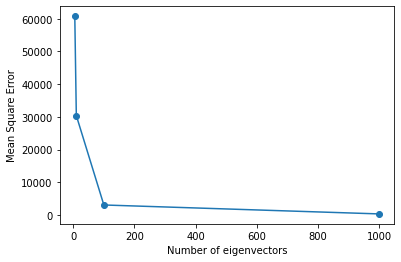

In [ ]:
# Plot Number of eigenvectors vs Mean Square Error
import matplotlib.pyplot as plt

plt.plot(pc, mean_sq_error, marker = 'o')

plt.xlabel('Number of eigenvectors')
plt.ylabel('Mean Square Error')
plt.show()

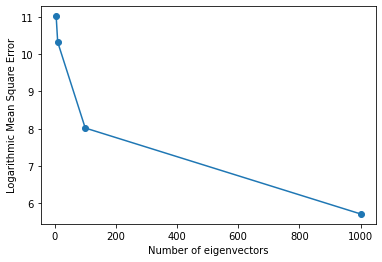

In [ ]:
# Plot Number of eigenvectors vs Logarithmic Mean Square Error
import matplotlib.pyplot as plt

plt.plot(pc, log_mse, marker = 'o')

plt.xlabel('Number of eigenvectors')
plt.ylabel('Logarithmic Mean Square Error')
plt.show()

In [ ]:
df = pd.DataFrame()
df['No of compoents']  = pc
df['Accuracy'] = accuracy
df

,No of compoents,Accuracy
0,5,92.5
1,10,92.5
2,100,92.5
3,1000,92.5


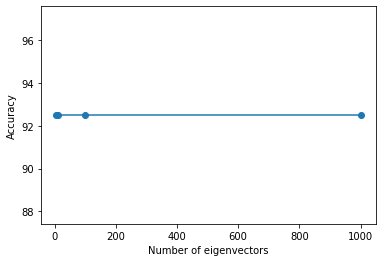

In [ ]:
import matplotlib.pyplot as plt

plt.plot(pc, accuracy, marker = 'o')

plt.xlabel('Number of eigenvectors')
plt.ylabel('Accuracy')
plt.show()

Summarise your observations on the plots and accuracies

**Answer:** Accuracy is 92.5 for k = 20, 50, 100, 200

State the advantages and limitations of using PCA in general. Also state its limitations in context of face recognition

**Answer:**
Advantages:

1. Dimensionality Reduction

2. Data Compression

3. Feature Extraction

4. Noise Reduction

Limitations:

1. Linear Transformations Only

2. Information Loss

3. Interpretability: The transformed features may not be easily interpretable, which can make it difficult to explain the results of the analysis.

In the context of face recognition, PCA has some limitations:

1. Illumination and Pose Variations: PCA is sensitive to illumination and pose variations in face images, which can make it difficult to recognize faces under different lighting conditions or angles.

2. Nonlinear Relationships: Faces have complex nonlinear relationships between different parts of the face, which may not be captured by linear PCA.

3. Limited Discriminative Power: PCA is a unsupervised method that does not take into account class labels. This can result in limited discriminative power when used for face recognition, where it is important to distinguish between different individuals.

4. Sensitivity to Variability: Faces can have high variability within the same person (e.g., due to aging or changes in facial hair), which can make it difficult for PCA to distinguish between different individuals.